In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Análise inicial do dataset

In [104]:
train_data = pd.read_csv('data/train.csv')

print("Informações do Dataset:")
display(train_data.info())

Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [105]:
print("\nEstatísticas Descritivas:")
display(train_data.describe())


Estatísticas Descritivas:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [106]:
print("\nValores Ausentes:")
display(train_data.isnull().sum())


Valores Ausentes:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Tratamento de valores ausentes

#### Note que existem 687 valores ausentes na coluna 'Cabin', isso representa 77% das linhas dos dados. Ou seja, temos decidir se vamos excluir essa coluna, preencher valores ausentes (O que para esse tipo de dado, acho que não faz sentido), criar uma nova coluna para representar se o passageiro possui um cabine ou não, ou retirar todas as linhas que possuem valores ausentes (O que remove 77%  das linhas dos dados).

#### Configuração: escolha a opção desejada (1, 2, 3 ou 4)

##### 1 = Excluir a coluna 'Cabin'
##### 2 = Preencher valores ausentes
##### 3 = Criar coluna 'Has_Cabin'
##### 4 = Remover linhas com valores ausentes na coluna 'Cabin'

In [107]:
option = 3

if option == 1:
    data_processed = train_data.drop(columns=['Cabin'])
    print("\nOpção 1: Coluna 'Cabin' foi removida.")

elif option == 2:
    data_processed = train_data.copy()
    data_processed['Cabin'] = data_processed['Cabin'].fillna('Unknown')
    print("\nOpção 2: Valores ausentes preenchidos com 'Unknown'.")

elif option == 3:
    data_processed = train_data.copy()
    data_processed.drop(columns=['Cabin'], inplace=True)
    data_processed['Has_Cabin'] = train_data['Cabin'].notnull().astype(int)
    print("\nOpção 3: Coluna 'Has_Cabin' criada para indicar presença de cabine.")

elif option == 4:
    data_processed = train_data.dropna(subset=['Cabin'])
    print(f"\nOpção 4: Linhas com valores ausentes removidas. Restam {len(data_processed)} linhas.")
    
else:
    print("Opção inválida. Escolha entre 1, 2, 3 ou 4.")
    data_processed = None

print(tabulate(data_processed.head(), headers='keys', showindex=True, tablefmt='grid'))

print("\nValores ausentes após o tratamento:")
display(data_processed.isnull().sum())




Opção 3: Coluna 'Has_Cabin' criada para indicar presença de cabine.
+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+------------+-------------+
|    |   PassengerId |   Survived |   Pclass | Name                                                | Sex    |   Age |   SibSp |   Parch | Ticket           |    Fare | Embarked   |   Has_Cabin |
+====+===============+============+==========+=====================================================+========+=======+=========+=========+==================+=========+============+=============+
|  0 |             1 |          0 |        3 | Braund, Mr. Owen Harris                             | male   |    22 |       1 |       0 | A/5 21171        |  7.25   | S          |           0 |
+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Has_Cabin        0
dtype: int64

### A mesma lógica se aplica para as colunas 'Age', que possuem valores ausentes.

#### Configuração: escolha a opção desejada (1, 2, 3 ou 4)
##### 1 = Excluir a coluna 'Age'
##### 2 = Preencher valores ausentes com a mediana
##### 3 = Preencher valores ausentes com a média
##### 4 = Remover linhas com valores ausentes na coluna 'Age'



In [108]:
option_age = 2

if option_age == 1:
    data_age_processed = data_processed.drop(columns=['Age'])
    print("\nOpção 1: Coluna 'Age' foi removida.")

elif option_age == 2:
    data_age_processed = data_processed.copy()
    median_age = data_processed['Age'].median()
    data_age_processed['Age'] = data_age_processed['Age'].fillna(median_age)
    print(f"\nOpção 2: Valores ausentes preenchidos com a mediana ({median_age}).")

elif option_age == 3:
    data_age_processed = data_processed.copy()
    mean_age = data_processed['Age'].mean()
    data_age_processed['Age'] = data_age_processed['Age'].fillna(mean_age)
    print(f"\nOpção 3: Valores ausentes preenchidos com a média ({mean_age:.2f}).")

elif option_age == 4:
    data_age_processed = data_processed.dropna(subset=['Age'])
    print(f"\nOpção 4: Linhas com valores ausentes removidas. Restam {len(data_age_processed)} linhas.")

else:
    print("Opção inválida. Escolha entre 1, 2, 3 ou 4.")
    data_age_processed = None

print(tabulate(data_age_processed.head(), headers='keys', showindex=True, tablefmt='grid'))

print("\nValores ausentes após o tratamento:")
display(data_age_processed.isnull().sum())


Opção 2: Valores ausentes preenchidos com a mediana (28.0).
+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+------------+-------------+
|    |   PassengerId |   Survived |   Pclass | Name                                                | Sex    |   Age |   SibSp |   Parch | Ticket           |    Fare | Embarked   |   Has_Cabin |
+====+===============+============+==========+=====================================================+========+=======+=========+=========+==================+=========+============+=============+
|  0 |             1 |          0 |        3 | Braund, Mr. Owen Harris                             | male   |    22 |       1 |       0 | A/5 21171        |  7.25   | S          |           0 |
+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+-------

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Has_Cabin      0
dtype: int64

### Como a coluna 'Embarked' possui apenas 2 valores ausentes, podemos optar por remover as linhas que possuem valores ausentes.

In [109]:
data_embarked_processed = data_age_processed.dropna(subset=['Embarked'])

processed_data = data_embarked_processed

print(tabulate(processed_data.head(), headers='keys', showindex=True, tablefmt='grid'))

print("\nValores ausentes após o tratamento:")
display(processed_data.isnull().sum())


+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+------------+-------------+
|    |   PassengerId |   Survived |   Pclass | Name                                                | Sex    |   Age |   SibSp |   Parch | Ticket           |    Fare | Embarked   |   Has_Cabin |
+====+===============+============+==========+=====================================================+========+=======+=========+=========+==================+=========+============+=============+
|  0 |             1 |          0 |        3 | Braund, Mr. Owen Harris                             | male   |    22 |       1 |       0 | A/5 21171        |  7.25   | S          |           0 |
+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+------------+-------------+
|  1 |             2 |        

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64

In [110]:
print("\nInformações do Dataset após o tratamento de valores ausentes:")
display(processed_data.info())


Informações do Dataset após o tratamento de valores ausentes:
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
 11  Has_Cabin    889 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 90.3+ KB


None

In [112]:
print("\nEstatísticas Descritivas após o tratamento de valores ausentes:")
display(processed_data.describe())


Estatísticas Descritivas após o tratamento de valores ausentes:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Has_Cabin
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681,0.227222
std,256.998173,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504,0.419273
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


# Análise exploratória

## Realizaremos alguns gráficos para entender melhor os dados.

### Definindo o estilo dos gráficos

In [113]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

### Plot 1: Contagem de sobreviventes


C:\Users\breno\AppData\Local\Temp\ipykernel_21068\1295832055.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=processed_data, x='Survived', palette='Set2')
C:\Users\breno\AppData\Local\Temp\ipykernel_21068\1295832055.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não Sobreviveu', 'Sobreviveu'], fontsize=12)


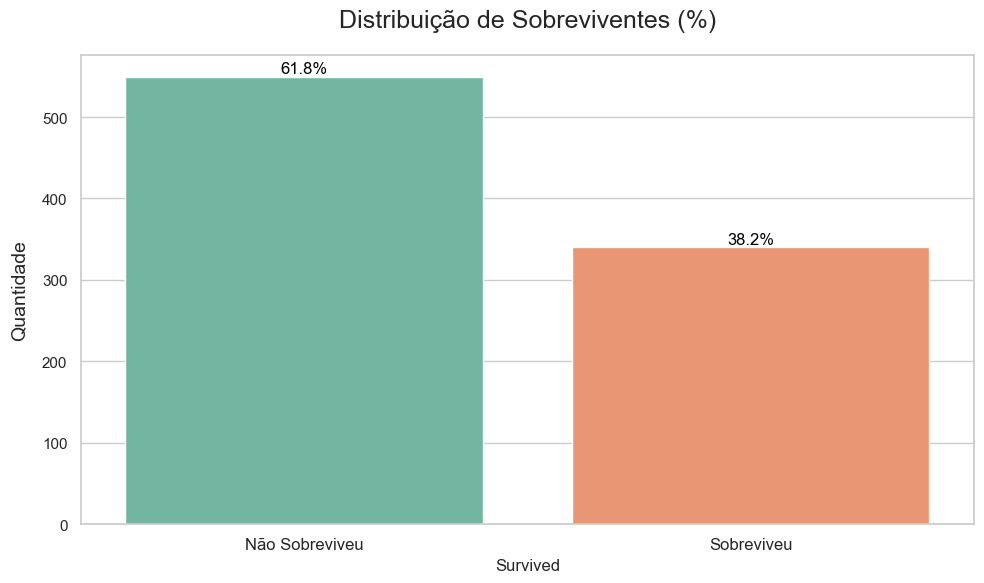

In [139]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(data=processed_data, x='Survived', palette='Set2')

for p in ax.patches:
    percentage = f"{100 * p.get_height() / len(processed_data):.1f}%"
    ax.annotate(percentage, 
                (p.get_x() + p.get_width() / 2., p.get_height() + 10),  
                ha='center', va='center', fontsize=12, color='black')

ax.set_title('Distribuição de Sobreviventes (%)', fontsize=18, pad=20)
ax.set_ylabel('Quantidade', fontsize=14, labelpad=10)
ax.set_xticklabels(['Não Sobreviveu', 'Sobreviveu'], fontsize=12)

plt.tight_layout()

plt.show()


### Plot 2: Idade por Sobrevivência


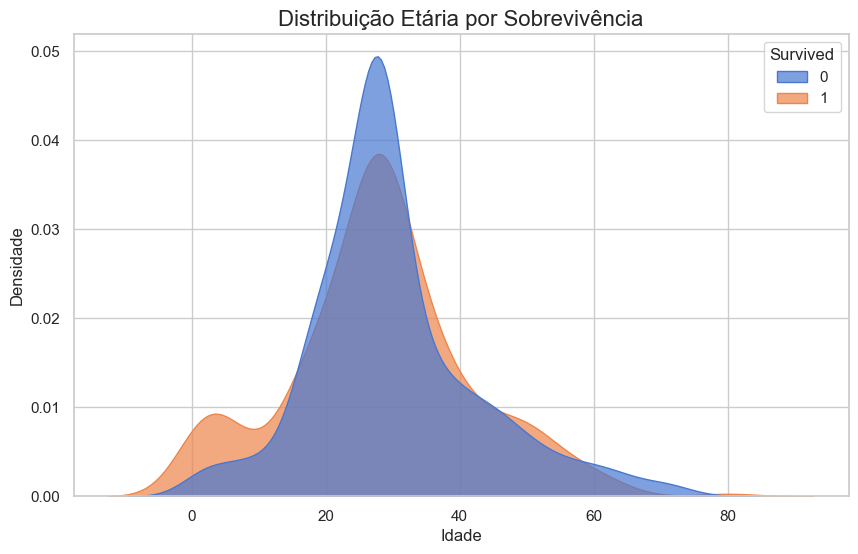

In [131]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=processed_data, x='Age', hue='Survived', fill=True, common_norm=False, palette='muted', alpha=0.7)
plt.title('Distribuição Etária por Sobrevivência', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
plt.show()

### Plot 3: Sobrevivência por Gênero e Classe

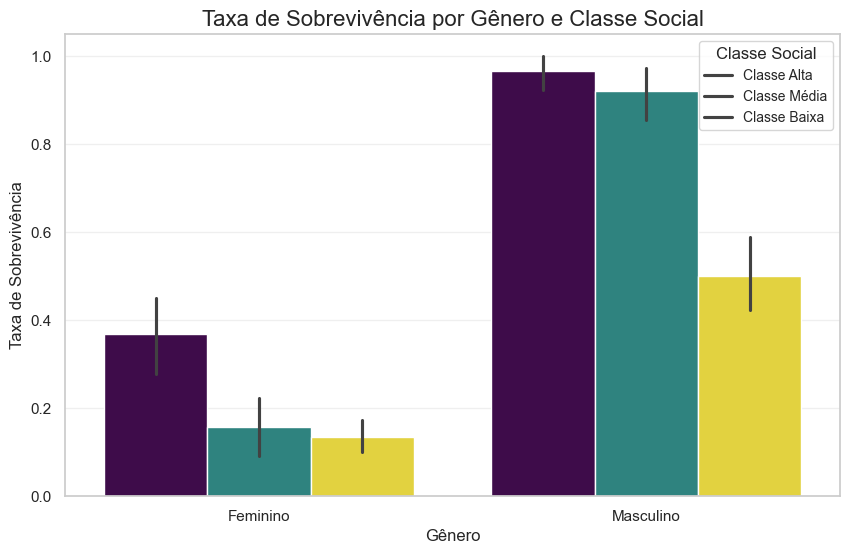

In [135]:
plt.figure(figsize=(10, 6))
sns.barplot(data=processed_data, x='Sex', y='Survived', hue='Pclass', palette='viridis')

plt.title('Taxa de Sobrevivência por Gênero e Classe Social', fontsize=16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Taxa de Sobrevivência', fontsize=12)

plt.legend(title='Classe Social',
          labels=['Classe Alta', 'Classe Média', 'Classe Baixa'],
          fontsize=10)

plt.xticks([0, 1], ['Feminino', 'Masculino'])

plt.grid(True, axis='y', alpha=0.3)

plt.show()

### Plot 4: Tarifa paga (Fare) por Sobrevivência

C:\Users\breno\AppData\Local\Temp\ipykernel_21068\3790935706.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=processed_data, x='Survived', y='Fare', palette='coolwarm')


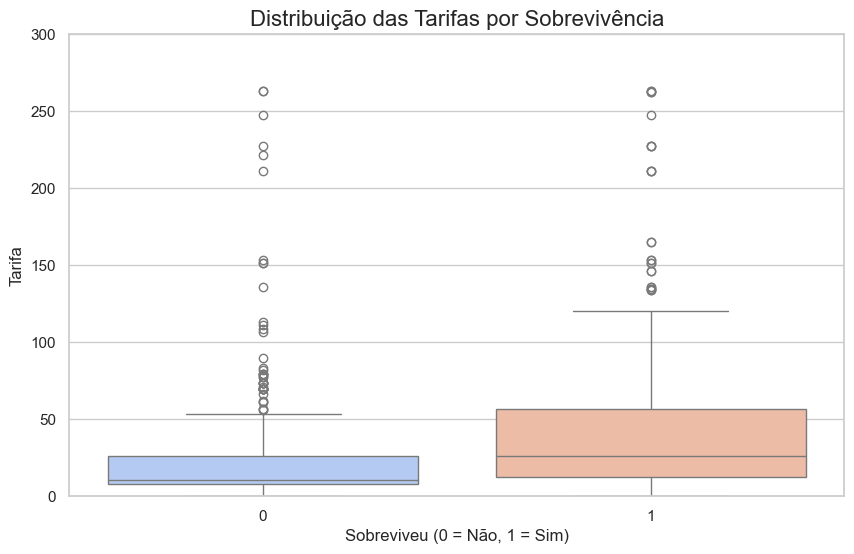

In [133]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=processed_data, x='Survived', y='Fare', palette='coolwarm')
plt.title('Distribuição das Tarifas por Sobrevivência', fontsize=16)
plt.xlabel('Sobreviveu (0 = Não, 1 = Sim)', fontsize=12)
plt.ylabel('Tarifa', fontsize=12)
plt.ylim(0, 300)  
plt.show()

### Plot 5: Taxa de sobrevivência por Presença de Cabine

C:\Users\breno\AppData\Local\Temp\ipykernel_21068\2946028839.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=processed_data, x='Has_Cabin', y='Survived', palette='Set1')


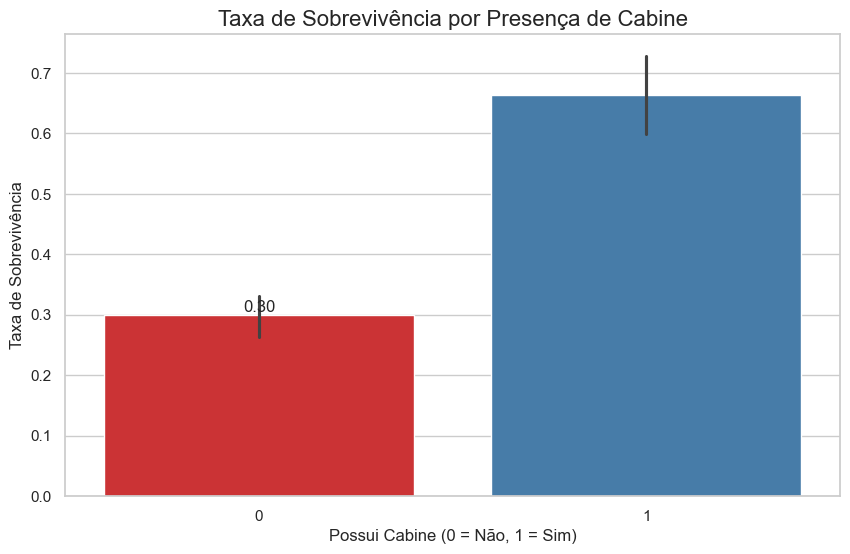

In [136]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=processed_data, x='Has_Cabin', y='Survived', palette='Set1')
ax.bar_label(ax.containers[0], fmt='%.2f')
ax.set_title('Taxa de Sobrevivência por Presença de Cabine', fontsize=16)
ax.set_xlabel('Possui Cabine (0 = Não, 1 = Sim)', fontsize=12)
ax.set_ylabel('Taxa de Sobrevivência', fontsize=12)
plt.show()

### Plot 6: Taxa de sobrevivência por Ponto de Embarque e Classe

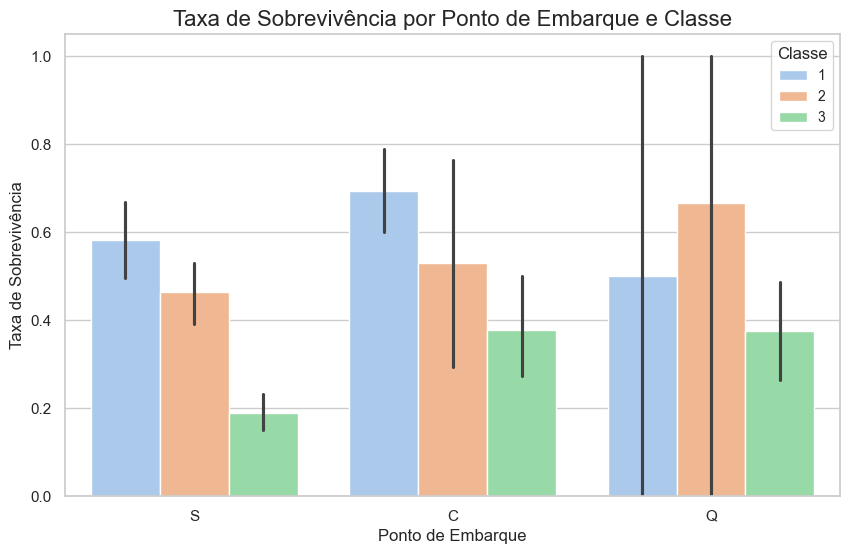

In [137]:
plt.figure(figsize=(10, 6))
sns.barplot(data=processed_data, x='Embarked', y='Survived', hue='Pclass', palette='pastel')
plt.title('Taxa de Sobrevivência por Ponto de Embarque e Classe', fontsize=16)
plt.xlabel('Ponto de Embarque', fontsize=12)
plt.ylabel('Taxa de Sobrevivência', fontsize=12)
plt.legend(title='Classe', fontsize=10)
plt.show()